#calculation

In [ ]:
!pip install plotly
!pip install kneed
!pip install sklearn_som
!pip install minisom
!pip install mlxtend
!pip install sklearn.external
!pip install joblib
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=7ac38ef6c7b5c790662f8663cb99c0a296296dc74dd991dd91e1c52f9e28b71c
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.external (from versions: none)
ERROR: No matching 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from IPython.display import clear_output
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#KNN_neighbors

In [ ]:
def k_NN_MODEL(k,x_train,x_test,y_train,y_test):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(x_train,y_train)
  predicted=neigh.predict(x_test)
  #print(f'the accuracy of KNN_neigbor ={accuracy_score(y_test,predicted)}')
  clear_output()
  return accuracy_score(y_test,predicted)

#logistic

In [ ]:
def logistic_model(x_train,x_test,y_train,y_test):
  clf  = LogisticRegression(random_state=32,max_iter=100)
  clf.fit(x_train,y_train)
  predicted=clf.predict(x_test)
  clear_output()
  # print(f'the accuracy of LogisticRegression  ={accuracy_score(y_test,predicted)}')
  return accuracy_score(y_test,predicted)
  

#part 2

#1

In [ ]:
df =pd.read_csv('Assignment3_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667,0
1,0.294118,0.542714,0.590164,0.434343,0.088652,0.538003,0.078992,0.200000,0
2,0.058824,0.437186,0.491803,0.373737,0.088652,0.554396,0.184031,0.016667,0
3,0.058824,0.723618,0.672131,0.464646,0.212766,0.687034,0.109735,0.416667,1
4,0.058824,0.557789,0.508197,0.131313,0.215130,0.357675,0.025619,0.033333,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=32)

In [ ]:
acc=[]
cat=[]
for i in range(30):
  knn_baseline=k_NN_MODEL(i+1,x_train,x_test,y_train,y_test)
  acc.append(knn_baseline)
  cat.append(i+1)
  #print(f'the accuracy = {knn_baseline}')
print(f'the optimal accuracy = {max(acc)}')

the optimal accuracy = 0.7916666666666666


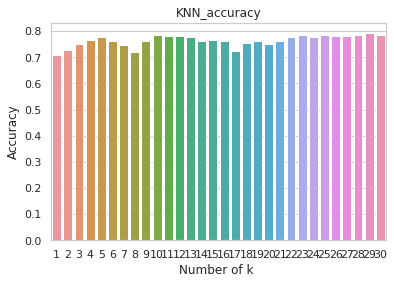

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid",)
ax = sns.barplot(x=cat, y=acc, data=df).set(title='KNN_accuracy',xlabel = "Number of k ", ylabel = "Accuracy")

In [ ]:
logistic_baseline=logistic_model(x_train,x_test,y_train,y_test)
print(f'the accuracy = {logistic_baseline}')

the accuracy = 0.7864583333333334


In [ ]:
#TRAIN
tsne_train = TSNE(n_components=2, learning_rate='auto',init='random')
tsne_train=tsne_train.fit_transform(x_train)
print(tsne_train.shape)
#TEST
tsne_test = TSNE(n_components=2, learning_rate='auto',init='random')
tsne_test=tsne_test.fit_transform(x_test)
print(tsne_test.shape)

(576, 2)
(192, 2)


Text(0.5, 1.0, 'tsne for training set')

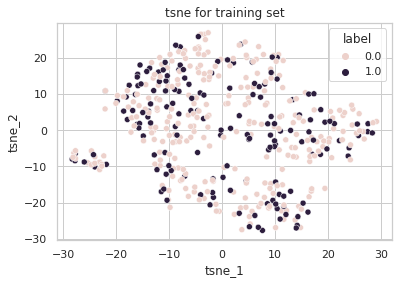

In [ ]:

tsne_train_df = pd.DataFrame()
tsne_train_df['tsne_1']=tsne_train[:,0]
tsne_train_df['tsne_2']=tsne_train[:,1]
tsne_train_df['label']=y_train
tsne_train_df
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_train_df)
plt.title('tsne for training set')

Text(0.5, 1.0, 'tsne for testing set')

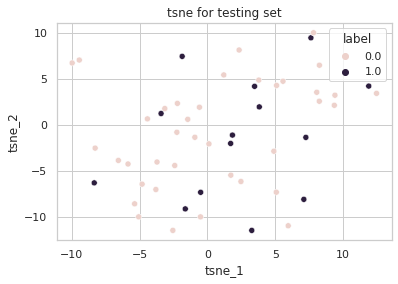

In [ ]:
tsne_test_df = pd.DataFrame()
tsne_test_df['tsne_1']=tsne_test[:,0]
tsne_test_df['tsne_2']=tsne_test[:,1]
tsne_test_df['label']=y_test
tsne_test_df
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_test_df)
plt.title('tsne for testing set')

#2


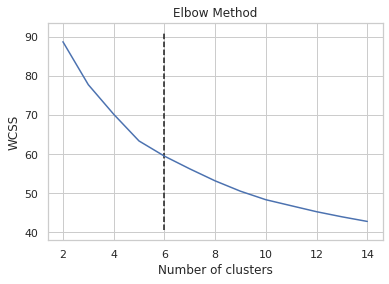

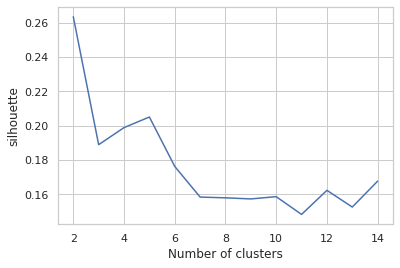

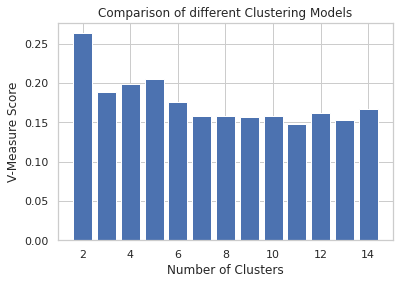

In [ ]:
#determine optimal number of clusters
def get_no_clusters(feature_data):
  wcss = []
  for i in range(2, 15):
      kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
      kmeans.fit(feature_data)
      wcss.append(kmeans.inertia_)
  kn1 = KneeLocator(range(2,15), wcss, curve='convex', direction='decreasing')
      
  plt.plot(range(2, 15), wcss)
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.vlines(kn1.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
  plt.show()
  
  s = []
  for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(feature_data)
    s.append(silhouette_score(feature_data, kmeans.labels_))

  plt.plot(range(2, 15), s)
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette')
  plt.show()
  clear_output

  plt.bar(range(2, 15), s)
  plt.xlabel('Number of Clusters')
  plt.ylabel('V-Measure Score')
  plt.title('Comparison of different Clustering Models')
  plt.show()
get_no_clusters(x_train)

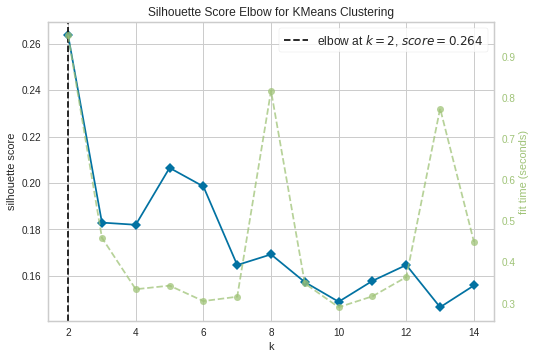

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
model = kelbow_visualizer(KMeans(random_state=200), x_train, k=(2,15),metric='silhouette',timings=True)  

In [ ]:
def k_mean_model(feature_data,k):

  #apply k_means
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=30, random_state=100)
  model=kmeans.fit(feature_data)
  pred_y = kmeans.predict(feature_data)
  return pred_y,model
pred_y,model=k_mean_model(x_train,2)


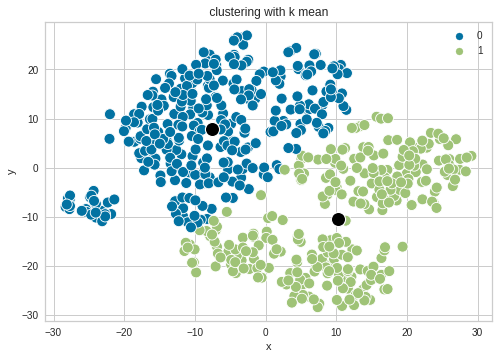

In [ ]:
def plot_kmeans(feature_data,title):
  
  kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=100)
  model=kmeans.fit(feature_data)
  pred_y = kmeans.predict(feature_data)

  #build dataframe
  new_df=pd.DataFrame()
  x_list=[]
  y_list=[]
  for i in feature_data:
    x_list.append(i[0])
    y_list.append(i[1])
 
  new_df['x']=pd.DataFrame(x_list)
  new_df['y']=pd.DataFrame(y_list)
  new_df['label']=pd.DataFrame(pred_y)
  
  #plot_seaborn
  sns.scatterplot(data=new_df,x=new_df.iloc[:,0],y=new_df.iloc[:,1],s=120,hue=new_df['label'])
  plt.title(f' {title}')
  sns.scatterplot(x=kmeans.cluster_centers_[:, 0],y=kmeans.cluster_centers_[:, 1],s=200,color='black')
plot_kmeans(tsne_train,'clustering with k mean ')

#3

In [ ]:
def split_data(df):
  x=df.iloc[:,:-1]
  y=df.iloc[:,-1:]
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=100)
  return x_train,x_test,y_train,y_test
  

In [ ]:
def pca_reduction(data,n):
  pca = PCA(n_components=n,random_state=0)
  new_feature=pca.fit_transform(data)
  return new_feature


In [ ]:
accuracies_knn=[]
accuracies_logistic=[]
ncomponent=[]
for i in range(8):
  x_train,x_test,y_train,y_test=split_data(df)

  x_train=pca_reduction(x_train,i+1)
  x_test=pca_reduction(x_test,i+1)

  acc_knn=k_NN_MODEL(5,x_train,x_test,y_train,y_test)
  acc_logistic=logistic_model(x_train,x_test,y_train,y_test)

  accuracies_knn.append(acc_knn)
  accuracies_logistic.append(acc_logistic)

  ncomponent.append(i+1)
print(f'knn accuracies = {accuracies_knn}')
print(f'logistics accuracies = {accuracies_logistic}')
print(f'the hieghst accuracy in KNN = {max(accuracies_knn)}')
print(f'the hieghst accuracy in logistics = {max(accuracies_logistic)}')

knn accuracies = [0.6302083333333334, 0.6666666666666666, 0.6354166666666666, 0.6875, 0.6614583333333334, 0.65625, 0.6770833333333334, 0.6822916666666666]
logistics accuracies = [0.640625, 0.6927083333333334, 0.671875, 0.671875, 0.65625, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
the hieghst accuracy in KNN = 0.6875
the hieghst accuracy in logistics = 0.6927083333333334


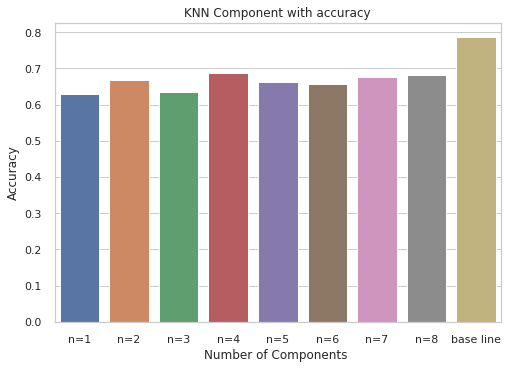

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid",)
ncomponent=['n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','base line']
accuracies_knn.append(knn_baseline)
ax = sns.barplot(x=ncomponent, y=accuracies_knn, data=df).set(title='KNN Component with accuracy',xlabel = "Number of Components ", ylabel = "Accuracy")


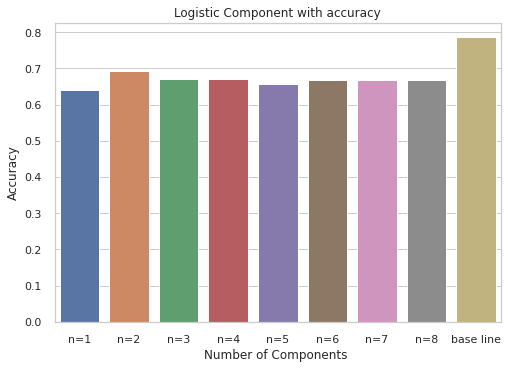

In [ ]:
accuracies_logistic.append(logistic_baseline)
ax = sns.barplot(x=ncomponent, y=accuracies_logistic, data=df).set(title='Logistic Component with accuracy',
                                                                   xlabel = "Number of Components ", ylabel = "Accuracy")

In [ ]:
x_train,x_test,y_train,y_test=split_data(df)
#apply pca=7 in KNN
x_train_knn=pca_reduction(x_train,7)
x_test_knn=pca_reduction(x_test,7)

#apply pca=2 in logic
x_train_logistic=pca_reduction(x_train,2)
x_test_logistic=pca_reduction(x_test,2)

In [ ]:
#------------------KNN-----------------
#TRAIN
tsne_train= TSNE(n_components=2, learning_rate='auto',init='random')
tsne_train_knn=tsne_train.fit_transform(x_train_knn)
print(tsne_train_knn.shape)
#TEST
tsne_test= TSNE(n_components=2, learning_rate='auto',init='random')
tsne_test_knn=tsne_test.fit_transform(x_test)
print(tsne_test_knn.shape)

(576, 2)
(192, 2)


Text(0.5, 1.0, 'training knn with reduction to n = 7')

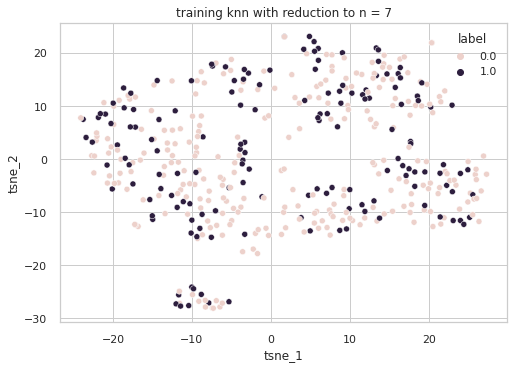

In [ ]:
tsne_train_df = pd.DataFrame()
tsne_train_df['tsne_1']=tsne_train_knn[:,0]
tsne_train_df['tsne_2']=tsne_train_knn[:,1]
tsne_train_df['label']=y_train
tsne_train_df
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_train_df)
plt.title('training knn with reduction to n = 7')

Text(0.5, 1.0, 'testing knn with reduction to n = 7')

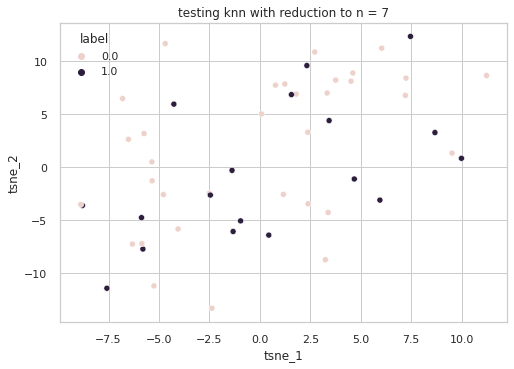

In [ ]:
tsne_test_df = pd.DataFrame()
tsne_test_df['tsne_1']=tsne_test_knn[:,0]
tsne_test_df['tsne_2']=tsne_test_knn[:,1]
tsne_test_df['label']=y_test
tsne_test_df
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_test_df)
plt.title('testing knn with reduction to n = 7')

In [ ]:
#------------------logistic-----------------
#TRAIN
tsne_train= TSNE(n_components=2, learning_rate='auto',init='random')
tsne_train_logistic=tsne_train.fit_transform(x_train_logistic)
print(tsne_train_logistic.shape)
#TEST
tsne_test= TSNE(n_components=2, learning_rate='auto',init='random')
tsne_test_logistic=tsne_test.fit_transform(x_test_logistic)
print(tsne_test_logistic.shape)

(576, 2)
(192, 2)


Text(0.5, 1.0, 'training logistic regression with reduction to n = 2')

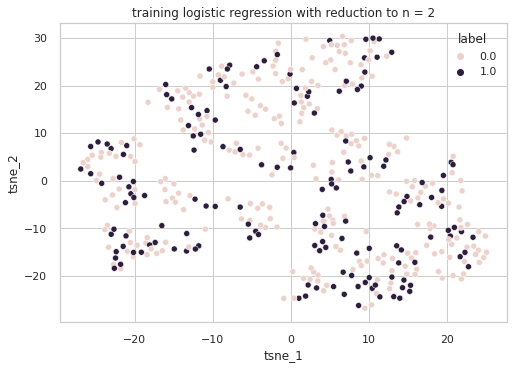

In [ ]:
tsne_train_df = pd.DataFrame()
tsne_train_df['tsne_1']=tsne_train_logistic[:,0]
tsne_train_df['tsne_2']=tsne_train_logistic[:,1]
tsne_train_df['label']=y_train
tsne_train_df
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_train_df)
plt.title('training logistic regression with reduction to n = 2')

Text(0.5, 1.0, 'testing logistic regression with reduction to n = 2')

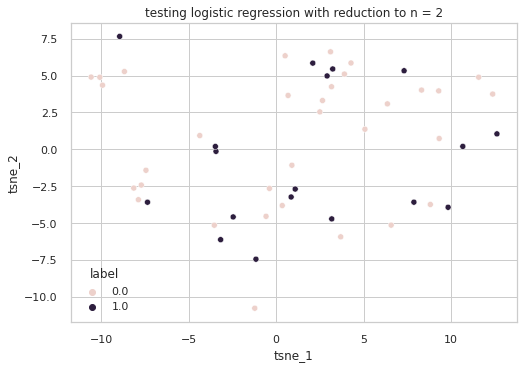

In [ ]:
tsne_test_df = pd.DataFrame()
tsne_test_df['tsne_1']=tsne_test_logistic[:,0]
tsne_test_df['tsne_2']=tsne_test_logistic[:,1]
tsne_test_df['label']=y_test
tsne_test_df
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_test_df)
plt.title('testing logistic regression with reduction to n = 2')

#4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eff3d1c50>,
      dtype=object)

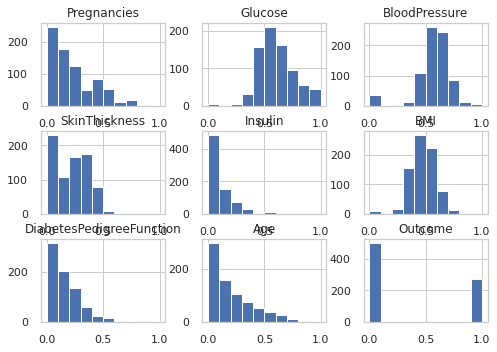

In [ ]:
df.hist()

In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,shuffle=True,random_state=0,stratify=Y)

In [ ]:
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
import plotly.express as express
from tqdm import tqdm
from sklearn.feature_selection import SelectKBest, chi2, RFE
!pip install --upgrade scikit-learn==0.20.3
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 124.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


##Feature Selection Depending On Information Gain

In [ ]:
importance = mutual_info_classif(X,Y)
print(importance)

mapping_keys = {}
keys = X.keys()
for i in range(0,len(importance)):
  mapping_keys[importance[i]] = keys[i]
print(mapping_keys)

[0.0253215  0.1271663  0.         0.01614652 0.03819432 0.09494499
 0.0134282  0.06711619]
{0.025321504063736677: 'Pregnancies', 0.12716630117462713: 'Glucose', 0.0: 'BloodPressure', 0.01614652248879378: 'SkinThickness', 0.0381943151911317: 'Insulin', 0.09494498879644286: 'BMI', 0.013428203712882114: 'DiabetesPedigreeFunction', 0.06711618726156132: 'Age'}


In [ ]:
sorted_values = sorted(mapping_keys)
sorted_features = []
for i in range(0,len(sorted_values)):
  sorted_features.append(mapping_keys.get(sorted_values[i]))

In [ ]:
sorted_features.reverse()

In [ ]:
def plot_accuracy_score(model,X,Y,model_type,sorted_features,n=2,m=8):
  accuracies = []
  for i in tqdm(range(n,m+1)):
    X_new = X[sorted_features[0:i]]
    x_train, x_test, y_train, y_test = train_test_split(X_new,Y,test_size=0.25,shuffle=True,random_state=421,stratify=Y)
    model.fit(x_train,y_train)
    acc = model.score(x_test,y_test)
    accuracies.append(acc)
  
  sns.lineplot(y = accuracies, x = range(n,m+1))
  sns.lineplot(y = accuracies[(len(accuracies)-1)],x = range(n,m+1))
  plt.title("Information Gain"+" "+model_type)
  plt.xlabel("Number Of Features")
  plt.ylabel("Accuracy")
  plt.show()

In [ ]:
X_new = X[sorted_features[0:2]]


In [ ]:
def plot_accuracy_score2(model,X,Y,model_type,sorted_features,n=2,m=8):
  accuracies = []
  for i in tqdm(range(n,m+1)):
    X_new = X[sorted_features[0:i]]
    x_train, x_test, y_train, y_test = train_test_split(X_new,Y,test_size=0.25,shuffle=True,random_state=421,stratify=Y)
    model.fit(x_train,y_train)
    acc = model.score(x_test,y_test)
    accuracies.append(acc)


  print(accuracies)
  
  sns.barplot(x = [2,3,4,5,6,7,8], y = accuracies)
  plt.title("Information Gain"+" "+ model_type)
  plt.xlabel("Number Of Features")
  plt.ylabel("Accuracy")
  plt.show()

In [ ]:
def plot_wrapper(x,accuracies,title,x_label,y_label):
  sns.lineplot(y = accuracies, x = x)
  sns.lineplot(y = accuracies[(len(accuracies)-1)],x = x)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

In [ ]:
importance = mutual_info_classif(X,Y)
importance

array([0.00655948, 0.13789385, 0.02603695, 0.02320962, 0.01430637,
       0.09437245, 0.01400779, 0.07731526])

In [ ]:
mapping_keys = {}
keys = X.keys()
for i in range(0,len(importance)):
  mapping_keys[importance[i]] = keys[i]
mapping_keys

{0.006559481781725829: 'Pregnancies',
 0.014007790838551637: 'DiabetesPedigreeFunction',
 0.014306374973754865: 'Insulin',
 0.023209624240782878: 'SkinThickness',
 0.02603694652385702: 'BloodPressure',
 0.07731525573087361: 'Age',
 0.09437245369420655: 'BMI',
 0.13789385253511033: 'Glucose'}

In [ ]:
express.bar(y = importance,x = X.keys(),color=importance,labels={"y":"Importance","x":"Features"},title="Feature Selection Depending On Information Gain")

100%|██████████| 7/7 [00:00<00:00, 77.80it/s]


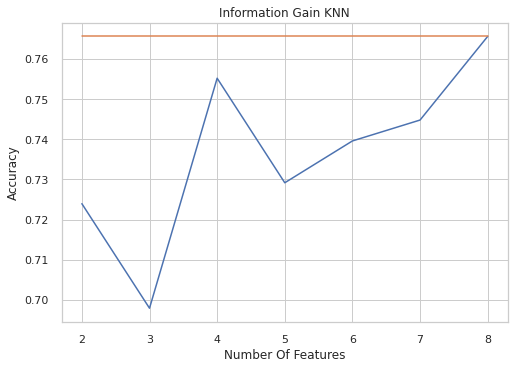

In [ ]:
#KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
plot_accuracy_score(knn,X,Y,"KNN",sorted_features,2,8)

100%|██████████| 7/7 [00:00<00:00, 72.52it/s]


[0.7239583333333334, 0.6979166666666666, 0.7552083333333334, 0.7291666666666666, 0.7395833333333334, 0.7447916666666666, 0.765625]


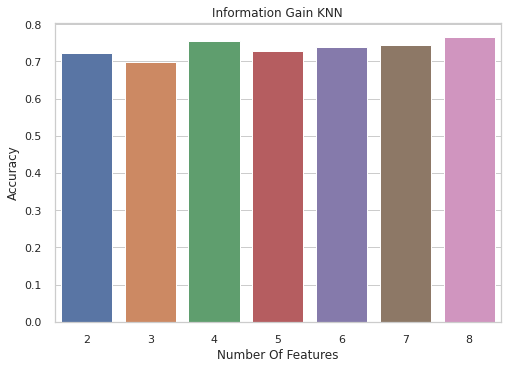

In [ ]:
plot_accuracy_score2(knn,X,Y,"KNN",sorted_features,2,8)

100%|██████████| 7/7 [00:00<00:00, 91.57it/s]


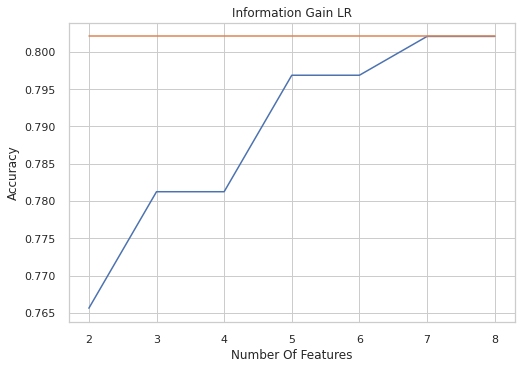

In [ ]:
#LR Model
lr = LogisticRegression()
plot_accuracy_score(lr,X,Y,"LR",sorted_features,2,8)

100%|██████████| 7/7 [00:00<00:00, 75.21it/s]


[0.765625, 0.78125, 0.78125, 0.796875, 0.796875, 0.8020833333333334, 0.8020833333333334]


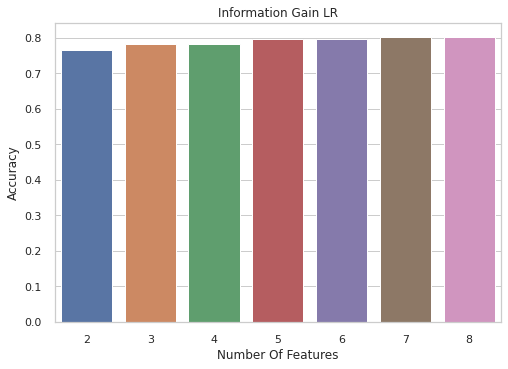

In [ ]:
plot_accuracy_score2(lr,X,Y,"LR",sorted_features,2,8)

##Feature Selection Depending On Variance Threshold

In [ ]:
#V-threshold
v_threshold = VarianceThreshold(threshold=0.03)
v_threshold.fit(X)
print(v_threshold.get_support()) #So We didn't drop any one of them
print(v_threshold.get_feature_names_out()) #So We didn't drop any one of them

[ True False False False False False False  True]
['Pregnancies' 'Age']


In [ ]:
#this technique say we will take all the features because all these features don't have variance of 0
#print KNN accuracy
threshold_x_train, threshold_x_test, threshold_y_train, threshold_y_test = train_test_split(
    df[v_threshold.get_feature_names_out()],
    Y,
    test_size=0.25,
    shuffle=True,
    random_state=0,
    stratify=Y
)
knn.fit(threshold_x_train,threshold_y_train)
print("The accuracy of KNN is : ",knn.score(threshold_x_test,threshold_y_test))

The accuracy of KNN is :  0.671875


In [ ]:
#print LR accuracy
lr.fit(threshold_x_train,threshold_y_train)
print("The accuracy of LR is : ",lr.score(threshold_x_test,threshold_y_test))

The accuracy of LR is :  0.6302083333333334


**After we finish we noticise that the information gane gave us the best accuracy for Knn and the best number of features is 2 and LR and the best number of features is 8**

In [ ]:
sfs = SFS(lr,
           k_features=8,
           forward=True,
           verbose=3,
           scoring='roc_auc',
           cv=4)

In [ ]:
#Use SFS to select the top 5 features 
sfs.fit(X, y)
clear_output()

In [ ]:
#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()

In [ ]:
df_SFS_results.sort_values(by='avg_score', axis = 0,inplace=True)
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)","[0.7841194029850747, 0.833134328358209, 0.7253...",0.786881,"(Glucose,)"
2,"(1, 5)","[0.8035820895522388, 0.8600597014925373, 0.765...",0.808597,"(Glucose, BMI)"
3,"(0, 1, 5)","[0.8174328358208955, 0.8462089552238806, 0.804...",0.822776,"(Pregnancies, Glucose, BMI)"
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8020298507462686, 0.8439402985074627, 0.833...",0.826269,"(Pregnancies, Glucose, BloodPressure, SkinThic..."
4,"(0, 1, 5, 6)","[0.8042985074626866, 0.8611343283582089, 0.825...",0.827313,"(Pregnancies, Glucose, BMI, DiabetesPedigreeFu..."
7,"(0, 1, 2, 3, 4, 5, 6)","[0.8079999999999999, 0.8583880597014926, 0.826...",0.828537,"(Pregnancies, Glucose, BloodPressure, SkinThic..."
5,"(0, 1, 2, 5, 6)","[0.8085970149253732, 0.8583880597014925, 0.826...",0.828806,"(Pregnancies, Glucose, BloodPressure, BMI, Dia..."
6,"(0, 1, 2, 4, 5, 6)","[0.8088358208955224, 0.8583880597014926, 0.828...",0.829343,"(Pregnancies, Glucose, BloodPressure, Insulin,..."


In [ ]:
#plot the lr score
import plotly.express as express
x=['1','1+5','0+1+5','0+1+2+3+4+5+6+7','0+1+5+6','0+1+2+3+4+5+6','0+1+2+5+6','0+1+2+4+5+6']
express.bar(x = x, 
            y = df_SFS_results.avg_score, 
            color = df_SFS_results.avg_score ,
            title="Plot LR With Wrapper",
            labels={"x":"feature_index","y":"avg_score"})

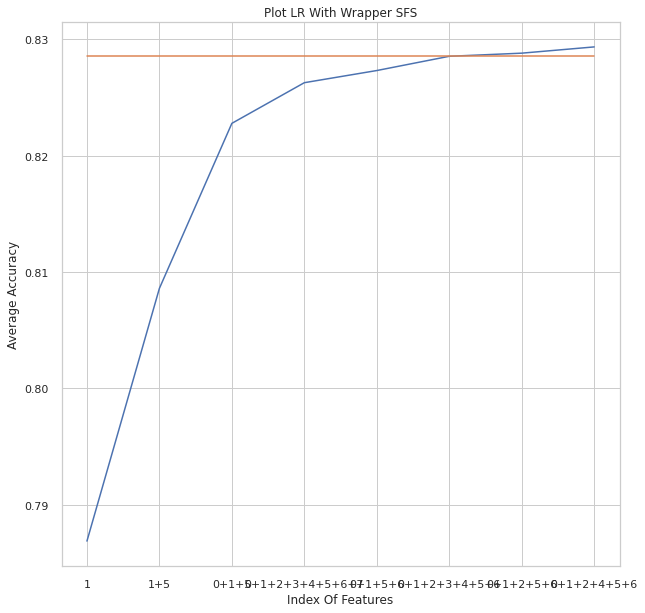

In [ ]:
plt.figure(figsize=(10,10))
plot_wrapper(x,df_SFS_results.avg_score,"Plot LR With Wrapper SFS","Index Of Features","Average Accuracy")

In [ ]:
sfs = SFS(knn,
           k_features=8,
           forward=True,
           verbose=3,
           scoring='roc_auc',
           cv=4)

In [ ]:
#Use SFS to select the top 5 features 
sfs.fit(X, y)
clear_output()

In [ ]:
#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()

In [ ]:
df_SFS_results.sort_values(by='avg_score',inplace = True, axis = 0)
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)","[0.6872238805970149, 0.7234029850746269, 0.670...",0.695373,"(Glucose,)"
2,"(1, 5)","[0.7340298507462686, 0.7426268656716418, 0.707...",0.730015,"(Glucose, BMI)"
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7697910447761194, 0.7448358208955224, 0.707...",0.747582,"(Pregnancies, Glucose, BloodPressure, SkinThic..."
6,"(0, 1, 2, 5, 6, 7)","[0.723044776119403, 0.7732537313432836, 0.7552...",0.751269,"(Pregnancies, Glucose, BloodPressure, BMI, Dia..."
7,"(0, 1, 2, 4, 5, 6, 7)","[0.7766567164179105, 0.7492537313432834, 0.726...",0.758761,"(Pregnancies, Glucose, BloodPressure, Insulin,..."
5,"(0, 1, 5, 6, 7)","[0.7885970149253732, 0.7585671641791045, 0.749...",0.76,"(Pregnancies, Glucose, BMI, DiabetesPedigreeFu..."
4,"(0, 1, 5, 7)","[0.7925373134328358, 0.7371343283582089, 0.753...",0.766657,"(Pregnancies, Glucose, BMI, Age)"
3,"(0, 1, 5)","[0.7854328358208955, 0.7562388059701493, 0.745...",0.769731,"(Pregnancies, Glucose, BMI)"


In [ ]:
#plot the KNN score
x=['1','1+5','0+1+2+3+4+5+6+7','0+1+2+5+6+7','0+1+2+4+5+6+7','0+1+5+6+7','0+1+5+7','0+1+5']
express.bar(x = x, y = df_SFS_results.avg_score, color = df_SFS_results.avg_score , title="Plot KNN With Wrapper",labels={"x":"feature_index","y":"avg_score"})

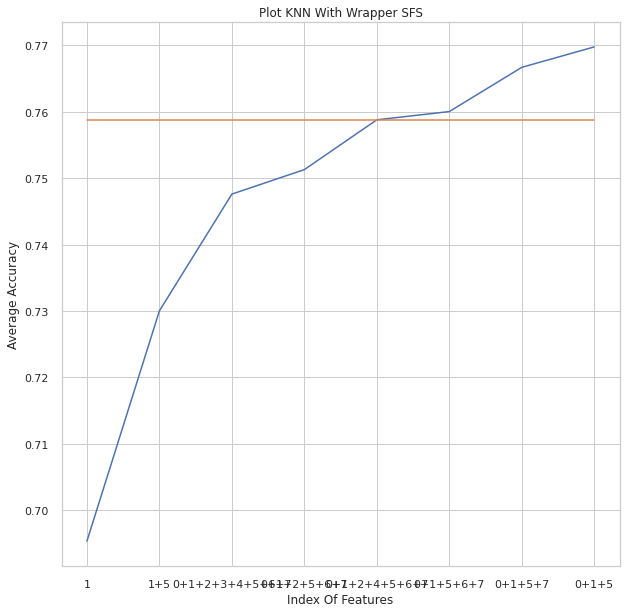

In [ ]:
plt.figure(figsize=(10,10))
plot_wrapper(x,df_SFS_results.avg_score,"Plot KNN With Wrapper SFS","Index Of Features","Average Accuracy")

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
def plot_RFE(model,x_train,y_train,x_test,y_test,title,x_label,y_label):
  scores = []
  for i in tqdm(range(1,9)):
    rfe = RFE(model, n_features_to_select=i,verbose=3)
    rfe.fit(x_train, y_train)
    print(rfe.get_support())
    score = rfe.score(x_test,y_test)
    scores.append(score)

  
  sns.lineplot(x = range(1,9),y = scores)
  sns.lineplot(y = scores[(len(scores)-1)],x = range(1,9))
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

 25%|██▌       | 2/8 [00:00<00:00, 19.12it/s]

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
[False  True False False False False False False]
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
[False  True False False False  True False False]
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
[ True  True False False False  True False False]
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
[ True  True False False False  True  True False]
Fitting estimator with 8 featu

100%|██████████| 8/8 [00:00<00:00, 28.90it/s]


[ True  True  True False False  True  True False]
Fitting estimator with 8 features.
Fitting estimator with 7 features.
[ True  True  True False False  True  True  True]
Fitting estimator with 8 features.
[ True  True  True False  True  True  True  True]
[ True  True  True  True  True  True  True  True]


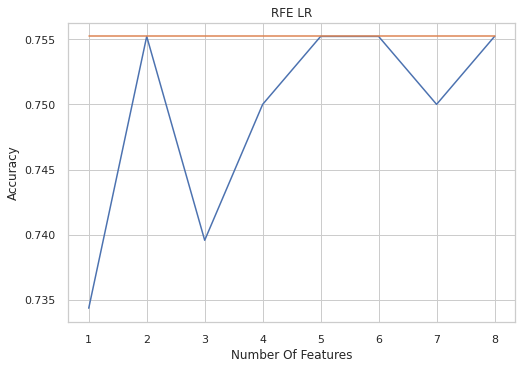

In [ ]:
plot_RFE(lr,x_train,y_train,x_test,y_test,"RFE LR","Number Of Features","Accuracy")

The best technique we will use is wrapper SFS using these three features **(Pregnancies, Glucose, BMI)** because it gave us the best accuracy with **KNN** and also with **LR**

In [ ]:
#Split data depending on the best number of features that gave us the best accuracy (Pregnancies, Glucose, BMI)
X = df.iloc[:,[0,1,5]]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,shuffle=True,random_state=0,stratify=Y)

In [ ]:
def plot_data_using_tsne(x_data,y_data,title,x_label,y_label):
  tsne = TSNE(n_components=2, verbose= 3)
  two_d_features = tsne.fit_transform(x_data)
  clear_output()
  fig = express.scatter(x = two_d_features[:, 0], y = two_d_features[:, 1], color=y_data, title= title,labels={"x":x_label,"y":y_label})
  fig.show()

In [ ]:
#Plot Train Data Depending On TSNE
plot_data_using_tsne(x_train,y_train,"Plot Train Data Depending On TSNE","X Features","Y Features")

In [ ]:
#Plot Test Data Depending On TSNE
plot_data_using_tsne(x_test,y_test,"Plot Test Data Depending On TSNE","X Features","Y Features")

#5
we will use the best number of dimentionality reduction by using these features (Pregnancies, Glucose, BMI) and K=2

In [ ]:
#Split the data depending on the best number of features
X = df.iloc[:,[0,1,5]]
Y = df.iloc[:, -1]

In [ ]:
#determine the best number of K
def best_number_of_k(X,n,m,title):
  silhouette_scores = []
  for i in tqdm(range(n,m+1)):
    kmeans = KMeans(n_clusters=i, random_state=420, init='k-means++', verbose=3, max_iter=400)
    kmeans.fit_transform(X)
    s_score = silhouette_score(X,kmeans.labels_,metric='euclidean',random_state=475)
    silhouette_scores.append(s_score)
  
  #plot the graph
  clear_output()
  plt.figure(figsize=(10,10))
  sns.lineplot(x = range(n,m+1), y = silhouette_scores)
  plt.title(title)
  plt.xlabel("Number Of Clusters 'K'")
  plt.ylabel("silhouette_score")
  plt.show()

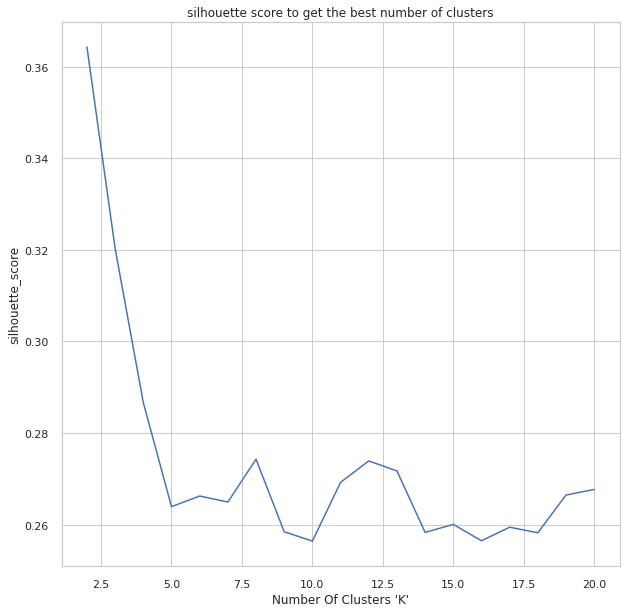

In [ ]:
best_number_of_k(X,2,20,"silhouette score to get the best number of clusters")

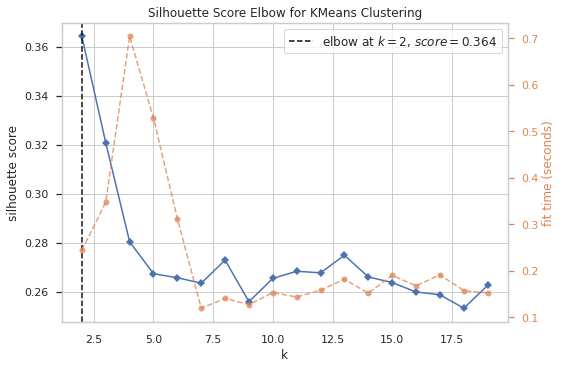

In [ ]:
#get the best number of clusters by using yellowbrick library
from yellowbrick.cluster.elbow import kelbow_visualizer
model = kelbow_visualizer(KMeans(random_state=200), X, k=(2,20),metric='silhouette',timings=True)  

**From the previous figure the best number of clusters is 2**

#Imports

In [ ]:
from IPython.display import clear_output
!pip install kneed
clear_output()


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from IPython.display import clear_output
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#6

In [ ]:
!pip install MiniSom
from minisom import MiniSom
clear_output()

In [ ]:
df=pd.read_csv('Assignment3_dataset.csv')

In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=32)

In [ ]:
x_axis = []
y_axis = []

for neuron in range(2,31):
  som = MiniSom(neuron, 1, x.shape[1], 
              neighborhood_function='gaussian', random_seed=0, topology='hexagonal')
  som.train_batch(x.values, 1500)
  
  pred = [som.winner(s)[0] for s in x.values]
  sil = silhouette_score(x, pred)
  
  x_axis.append(neuron)
  y_axis.append(sil)
clear_output()

<function matplotlib.pyplot.show>

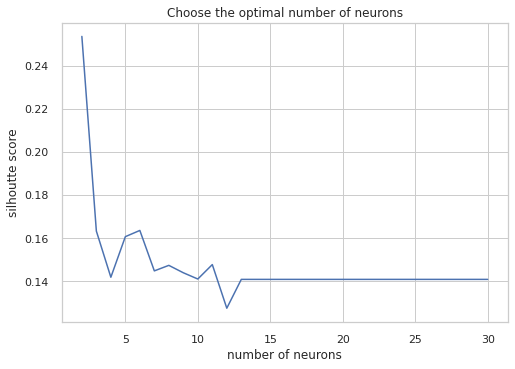

In [ ]:
plt.plot(x_axis, y_axis)
plt.xlabel('number of neurons')
plt.ylabel('silhoutte score')
plt.title('Choose the optimal number of neurons')
plt.show

##Visualize

In [ ]:
n = 2
m = 1
som = MiniSom(n, m, x.shape[1], neighborhood_function='gaussian', random_seed=0, topology='hexagonal')
initial_neurons = np.array(som.get_weights()).reshape((n * m,8))
som.train_batch(x.values, 1500)
clear_output()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_features=pca.fit_transform(x.values)

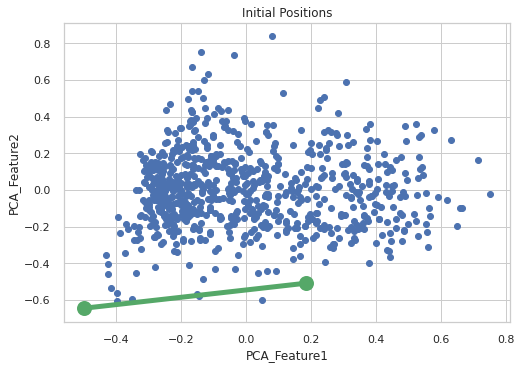

In [ ]:
initial_neurons = pca.transform(initial_neurons)

plt.scatter(new_features[:,0], new_features[:,1])
plt.plot(initial_neurons[:,0], initial_neurons[:,1], 'go-', linewidth=5, markersize=15)

plt.xlabel('PCA_Feature1')
plt.ylabel('PCA_Feature2')
plt.title('Initial Positions')
plt.show()

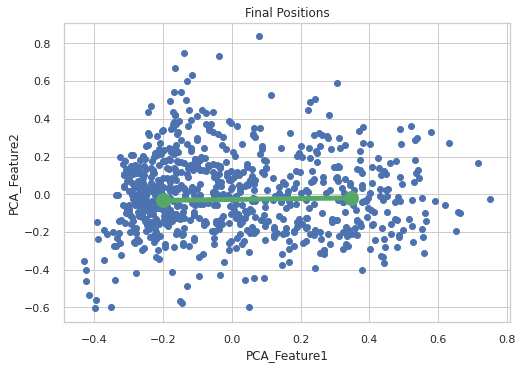

In [ ]:
final_neurons = som.get_weights().reshape((n * m,8))
final_neurons = pca.transform(final_neurons)

plt.scatter(new_features[:,0], new_features[:,1])
plt.plot(final_neurons[:,0], final_neurons[:,1], 'go-', linewidth=5, markersize=15)

plt.xlabel('PCA_Feature1')
plt.ylabel('PCA_Feature2')
plt.title('Final Positions')
plt.show()

#7

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
l = []
for e in np.linspace(0.3, 0.7, 20):
  for m in range(2,16):
    model = DBSCAN(eps=e, min_samples=m)
    predClusters = model.fit_predict(x)

    labels = model.labels_
    xx = x[labels != -1]
    labels = labels[labels != -1]
    unique_labels = np.unique(labels)
    n_of_clusters = len(unique_labels)
    if n_of_clusters > 1:
      sil = silhouette_score(xx, labels)
    else: 
      sil = 0

    l.append((e, m, n_of_clusters, sil))

In [ ]:
from operator import itemgetter
l = sorted(l, key = itemgetter(3), reverse = True) # sort according to silhoutte score
l = np.array(l)

In [ ]:
coordinate1 = l[l[:,2] == 2]

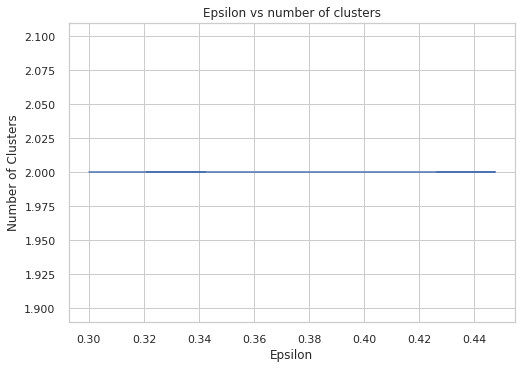

In [ ]:
plt.plot(coordinate1[:10,0], coordinate1[:10,2])
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('Epsilon vs number of clusters')
plt.show()

In [ ]:
coordinate2 = l[l[:,2] == 2]

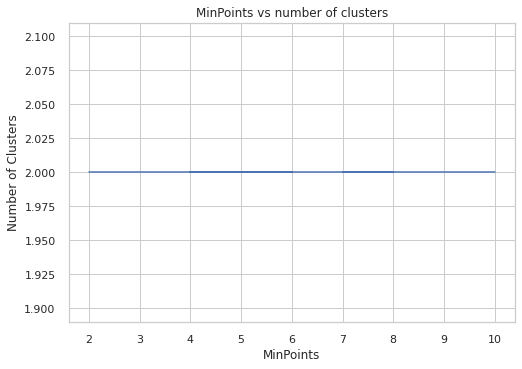

In [ ]:
plt.plot(coordinate2[:10,1], coordinate2[:10,2])
plt.xlabel('MinPoints')
plt.ylabel('Number of Clusters')
plt.title('MinPoints vs number of clusters')
plt.show()